In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##RECUPERAÇÃO, ROUBO E FURTO DE VEÍCULOS

In [3]:
df_DOmensal = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv', sep= ';')
#df.info()

In [4]:
df_DOmensal_2014 = df_DOmensal.loc[(df_DOmensal['ano']>=2014) & (df_DOmensal['ano'] < 2025)]
df_DOmensal_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 276 to 407
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ano                         132 non-null    int64  
 1   mes                         132 non-null    int64  
 2   hom_doloso                  132 non-null    int64  
 3   lesao_corp_morte            132 non-null    float64
 4   latrocinio                  132 non-null    int64  
 5   cvli                        132 non-null    float64
 6   hom_por_interv_policial     132 non-null    float64
 7   letalidade_violenta         132 non-null    int64  
 8   tentat_hom                  132 non-null    int64  
 9   lesao_corp_dolosa           132 non-null    int64  
 10  estupro                     132 non-null    float64
 11  hom_culposo                 132 non-null    float64
 12  lesao_corp_culposa          132 non-null    float64
 13  roubo_transeunte            132 non-nu

In [5]:
#soma do total por ano
df_rec = df_DOmensal_2014.groupby(['ano'])['recuperacao_veiculos'].sum().reset_index() 
df_rb = df_DOmensal_2014.groupby(['ano'])['roubo_veiculo'].sum().reset_index()
df_f = df_DOmensal_2014.groupby(['ano'])['furto_veiculos'].sum().reset_index()

In [6]:
#transforma dados de ano em string
df_rec['ano']=df_rec['ano'].astype(str)

In [7]:
#MÉDIA, MEDIANA E DISTÂNIA DA RECUPERAÇÃO DE VEÍCULOS
array_rec = np.array(df_rec['recuperacao_veiculos'])
media_rec = np.mean(array_rec)
mediana_rec = np.median(array_rec)
distancia_rec = (media_rec - mediana_rec)/mediana_rec
print(f"MÉDIA = {media_rec:.2f}\nMEDIANA = {mediana_rec:.2f}\nDISTÂNCIA = {distancia_rec:.2f}")

MÉDIA = 23189.73
MEDIANA = 23663.00
DISTÂNCIA = -0.02


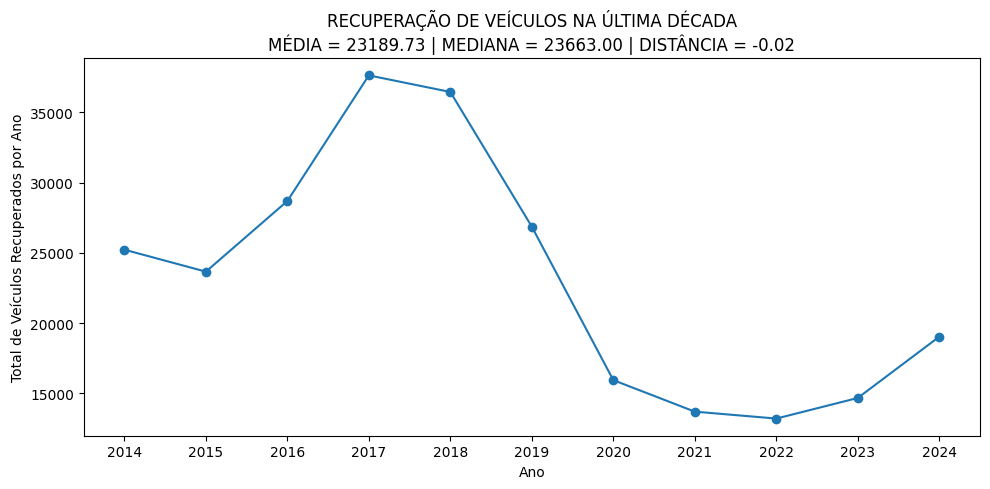

In [8]:
#GRÁFICO DO TOTAL DE RECUPERÇÃO DE VEÍCULOS POR ANO
plt.figure(figsize=(10,5))
plt.plot(df_rec['ano'], df_rec['recuperacao_veiculos'], marker='o', linestyle='-')
plt.title(f'RECUPERAÇÃO DE VEÍCULOS NA ÚLTIMA DÉCADA\nMÉDIA = {media_rec:.2f} | MEDIANA = {mediana_rec:.2f} | DISTÂNCIA = {distancia_rec:.2f}')
plt.xlabel('Ano')
plt.ylabel('Total de Veículos Recuperados por Ano')
plt.tight_layout()
plt.show()

In [9]:
#ARRAY + MÉDIA, MEDIANA E DISTÂNIA DO ROUBO DE VEÍCULOS
array_rb = np.array(df_rb['roubo_veiculo'])
media_rb = np.mean(array_rb)
mediana_rb = np.median(array_rb)
distancia_rb = (media_rb - mediana_rb)/mediana_rb
print(f"MÉDIA = {media_rb:.2f}\nMEDIANA = {mediana_rb:.2f}\nDISTÂNCIA = {distancia_rb:.2f}")

MÉDIA = 34520.64
MEDIANA = 31035.00
DISTÂNCIA = 0.11


In [10]:
#transformando dados de 'ano" em string
df_rb['ano']=df_rb['ano'].astype(str)

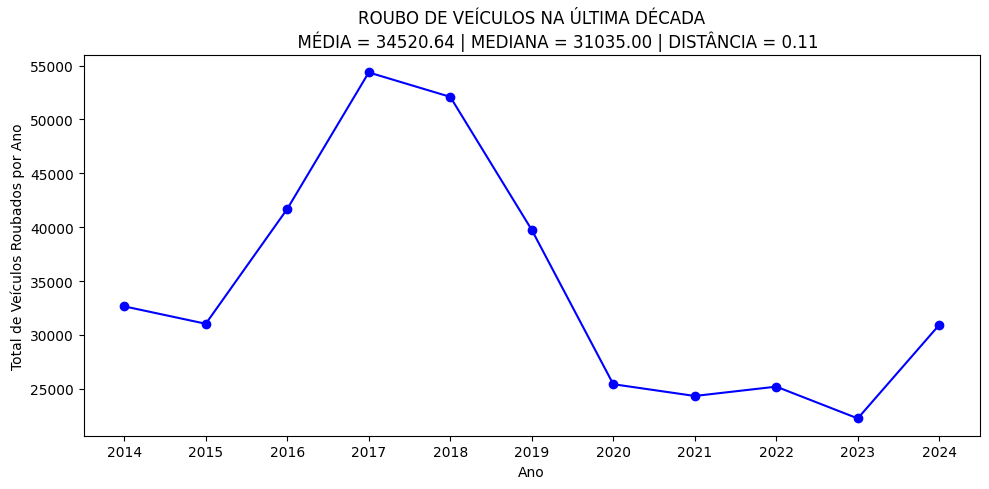

In [11]:
#GRÁFICO DO TOTAL DE ROUBOS DE VEÍCULOS POR ANO
plt.figure(figsize=(10,5))
plt.plot(df_rb['ano'], df_rb['roubo_veiculo'], marker='o', linestyle='-', color="blue")
plt.title(f'ROUBO DE VEÍCULOS NA ÚLTIMA DÉCADA\n\
          MÉDIA = {media_rb:.2f} | MEDIANA = {mediana_rb:.2f} | DISTÂNCIA = {distancia_rb:.2f}')
plt.xlabel('Ano')
plt.ylabel('Total de Veículos Roubados por Ano')
plt.tight_layout()
plt.show()

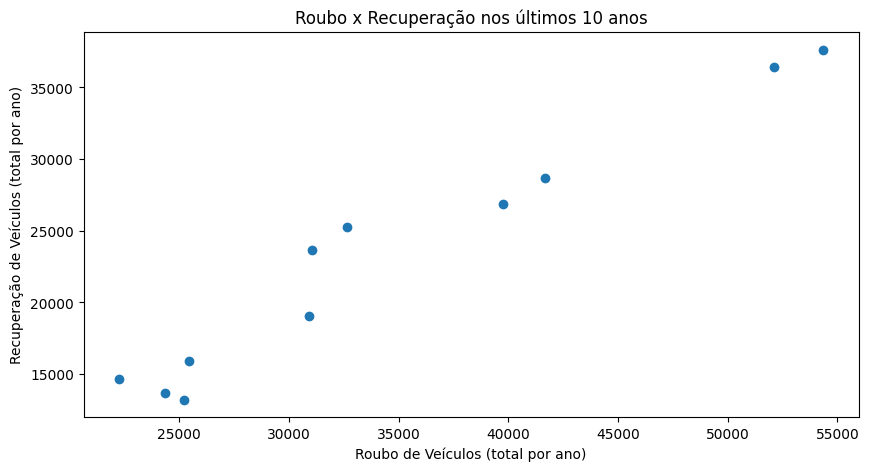

In [12]:
#GRÁFICO DISPERSÃO DE ROUBO DE VEÍCULOS POR ANO
plt.figure(figsize=(10,5))
plt.scatter(df_rb['roubo_veiculo'],df_rec['recuperacao_veiculos'])
plt.title('Roubo x Recuperação nos últimos 10 anos')
plt.xlabel('Roubo de Veículos (total por ano)')
plt.ylabel('Recuperação de Veículos (total por ano)')
plt.show()


In [13]:
#ARRAY + MÉDIA, MEDIANA E DISTÂNIA DO FURTO DE VEÍCULOS
array_f = np.array(df_f['furto_veiculos'])
media_f = np.mean(array_f)
mediana_f = np.median(array_f)
distancia_f = (media_f - mediana_f)/mediana_f
print(f"MÉDIA = {media_f:.2f}\nMEDIANA = {mediana_f:.2f}\nDISTÂNCIA = {distancia_f:.2f}")

MÉDIA = 16053.09
MEDIANA = 16577.00
DISTÂNCIA = -0.03


In [14]:
#transformando dados de 'ano" em string
df_f['ano']=df_f['ano'].astype(str)

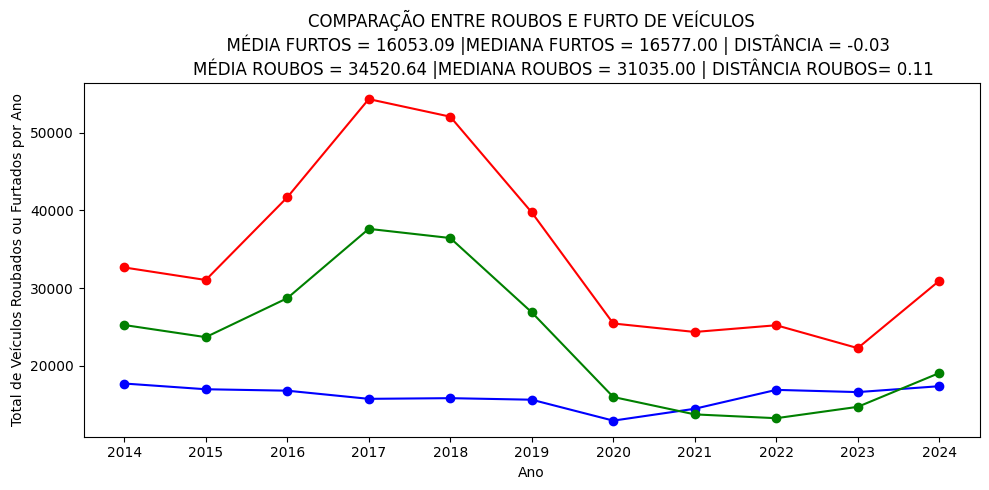

In [15]:
#GRÁFICO DE COMPARAÇÃO ENTRE ROUBOS E FURTO DE VEÍCULOS POR ANO
plt.figure(figsize=(10,5))
plt.plot(df_f['ano'], df_f['furto_veiculos'], marker='o', linestyle='-', color="blue")
plt.plot(df_rb['ano'], df_rb['roubo_veiculo'], marker='o', linestyle='-', color="red")
plt.plot(df_rec['ano'], df_rec['recuperacao_veiculos'], marker='o', linestyle='-', color="green")
plt.title(f'COMPARAÇÃO ENTRE ROUBOS E FURTO DE VEÍCULOS\n\
          MÉDIA FURTOS = {media_f:.2f} |MEDIANA FURTOS = {mediana_f:.2f} | DISTÂNCIA = {distancia_f:.2f}\n\
            MÉDIA ROUBOS = {media_rb:.2f} |MEDIANA ROUBOS = {mediana_rb:.2f} | DISTÂNCIA ROUBOS= {distancia_rb:.2f}')
plt.xlabel('Ano')
plt.ylabel('Total de Veículos Roubados ou Furtados por Ano')
plt.tight_layout()
plt.show()

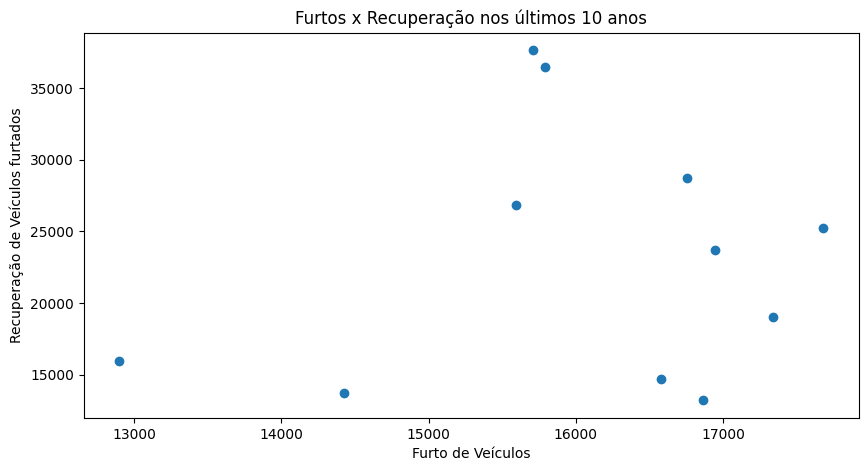

In [16]:
#GRÁFICO DISPERSÃO DE FURTO DE VEÍCULOS POR ANO
plt.figure(figsize=(10,5))
plt.scatter(df_f['furto_veiculos'],df_rec['recuperacao_veiculos'])
plt.title('Furtos x Recuperação nos últimos 10 anos')
plt.xlabel('Furto de Veículos')
plt.ylabel('Recuperação de Veículos furtados')
plt.show()

# Apreensão de menores na Baixada Fluminense

In [17]:
df_base_mun_mensal = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv', sep = ';',  encoding= 'latin1')
df_base_mun_mensal.head(5)

,fmun_cod,fmun,ano,mes,mes_ano,regiao,hom_doloso,lesao_corp_morte,latrocinio,cvli,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,3300100,Angra dos Reis,2014,1,2014m01,Interior,11,0,0,11,...,8,0,98,13,3,0,0,0,561,3
1,3300159,Aperibé,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,3300209,Araruama,2014,1,2014m01,Interior,2,0,0,2,...,5,0,91,10,1,0,0,0,480,3
3,3300225,Areal,2014,1,2014m01,Interior,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,3300233,Armação dos Búzios,2014,1,2014m01,Interior,2,0,0,2,...,3,2,46,0,0,0,0,0,309,3


In [18]:
df_base_mun_mensal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12604 entries, 0 to 12603
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fmun_cod                    12604 non-null  int64 
 1   fmun                        12604 non-null  object
 2   ano                         12604 non-null  int64 
 3   mes                         12604 non-null  int64 
 4   mes_ano                     12604 non-null  object
 5   regiao                      12604 non-null  object
 6   hom_doloso                  12604 non-null  int64 
 7   lesao_corp_morte            12604 non-null  int64 
 8   latrocinio                  12604 non-null  int64 
 9   cvli                        12604 non-null  int64 
 10  hom_por_interv_policial     12604 non-null  int64 
 11  letalidade_violenta         12604 non-null  int64 
 12  tentat_hom                  12604 non-null  int64 
 13  lesao_corp_dolosa           12604 non-null  in

In [19]:
#RECORTE POR REGIÃO E SOMA DO NÚMERO DE APREENSÕES POR MUNICIPIO DA BAIXADA FLUMINENSE].
df_reg = df_base_mun_mensal.loc[(df_base_mun_mensal['regiao'] == 'Baixada Fluminense')]
df_men = df_reg.groupby(['fmun'])['aaapai'].sum().reset_index()
df_men = df_men.sort_values(by = 'aaapai' , ascending=False).reset_index()
df_men

,index,fmun,aaapai
0,1,Duque de Caxias,2971
1,12,Nova Iguaçu,2496
2,18,São João de Meriti,2039
3,0,Belford Roxo,1513
4,7,Magé,802
5,8,Mesquita,758
6,4,Itaguaí,423
7,10,Nilópolis,400
8,14,Queimados,364
9,5,Japeri,257


In [20]:
#ARRAY + Q1, Q2 E Q3 Da AAAPAI
df_array_m = np.array(df_men['aaapai'])
q1 = np.percentile(df_array_m, 25)
q2 = np.percentile(df_array_m, 50)
q3 = np.percentile(df_array_m, 75)
print(f"Q1={q1}\nQ2={q2}\nQ3={q3}")



Q1=22.0
Q2=257.0
Q3=780.0


In [21]:
#MÉDIA, MEDIANA E DISTÂNIA aaapai
media_men = np.mean(df_array_m)
mediana_men = np.median(df_array_m)
distancia_men = (media_men - mediana_men)/mediana_men
print(f"MÉDIA = {media_men:.2f}\nMEDIANA = {mediana_men:.2f}\nDISTÂNCIA = {distancia_men:.2f}")

MÉDIA = 666.32
MEDIANA = 257.00
DISTÂNCIA = 1.59


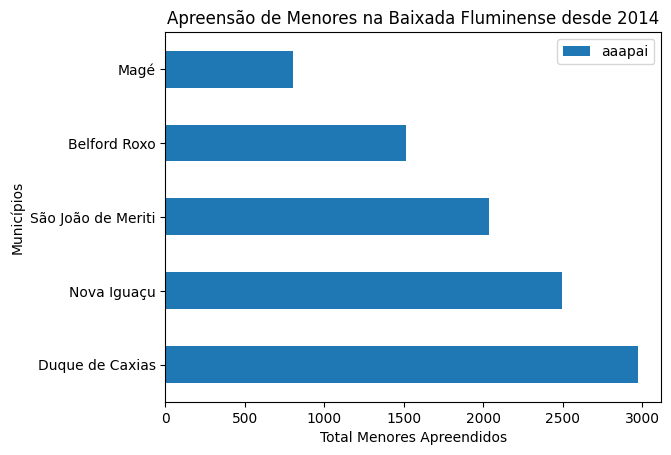

In [22]:
#GRAFICO MUNICÍPIOS DA BAIXADA QUE COMPÕEM OS 25% COM MAIS APREENSÕES (q3).
df_men_q3 = df_men.loc[(df_men['aaapai'] >= q3 )]
df_men_q3.plot(kind='barh' , x= 'fmun', y= 'aaapai')
plt.xlabel('Total Menores Apreendidos')
plt.ylabel('Municípios')
plt.title('Apreensão de Menores na Baixada Fluminense desde 2014')
plt.show()

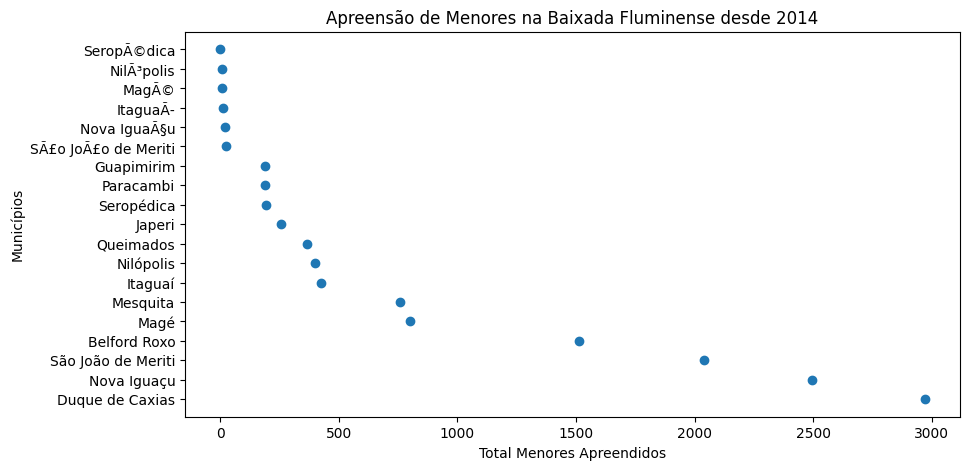

In [23]:
plt.figure(figsize=(10,5))
plt.scatter(df_men['aaapai'],df_men['fmun'])
plt.title('Apreensão de Menores na Baixada Fluminense desde 2014')
plt.xlabel('Total Menores Apreendidos')
plt.ylabel('Municípios')
plt.show()

# Estelionato

In [24]:
df_baseDPE = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep = ';',  encoding= 'latin1')
df_baseDPE = df_baseDPE.loc[(df_baseDPE['ano']>=2004) & (df_baseDPE['ano'] < 2025)]
df_baseDPE.info()
df_baseDPE.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 34007 entries, 1526 to 35532
Data columns (total 63 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cisp                        34007 non-null  int64  
 1   mes                         34007 non-null  int64  
 2   ano                         34007 non-null  int64  
 3   mes_ano                     34007 non-null  object 
 4   aisp                        34007 non-null  int64  
 5   risp                        34007 non-null  int64  
 6   munic                       34007 non-null  object 
 7   mcirc                       34007 non-null  int64  
 8   regiao                      34007 non-null  object 
 9   hom_doloso                  34007 non-null  int64  
 10  lesao_corp_morte            34007 non-null  int64  
 11  latrocinio                  34007 non-null  int64  
 12  cvli                        34007 non-null  int64  
 13  hom_por_interv_policial     34007

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
1526,1,1,2004,2004m01,5,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,14,3,0,0,0,0,637,3
1527,4,1,2004,2004m01,5,1,Rio de Janeiro,3304557,Capital,1,...,NaN,NaN,32,3,1,0,0,0,447,3
1528,5,1,2004,2004m01,13,1,Rio de Janeiro,3304557,Capital,2,...,NaN,NaN,64,4,1,0,0,0,699,3
1529,6,1,2004,2004m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,36,2,3,0,0,0,455,3
1530,7,1,2004,2004m01,1,1,Rio de Janeiro,3304557,Capital,2,...,NaN,NaN,11,0,3,4,0,0,143,3


In [25]:
#Analisar a evolução dos registros de estelionato na cidade do Rio de Janeiro.
df_RJ = df_baseDPE.loc[(df_baseDPE['munic'] == 'Rio de Janeiro')]
df_estl = df_RJ.groupby(['ano'])['estelionato'].sum().reset_index()
df_estl = df_estl.sort_values(by = 'ano').reset_index()
df_estl

,index,ano,estelionato
0,0,2004,7727
1,1,2005,9101
2,2,2006,11020
3,3,2007,13319
4,4,2008,13589
5,5,2009,12520
6,6,2010,14292
7,7,2011,17574
8,8,2012,19589
9,9,2013,21093


In [26]:
#TRANSFORMA DADOS DE 'ANO' EM STRING
df_estl['ano']=df_estl['ano'].astype(str)

In [27]:
#ARRAY + MÉDIA, MEDIANA E DISTANCIA
df_array_estl = np.array(df_estl['estelionato'])
media_estl = np.mean(df_array_estl)
mediana_estl = np.median(df_array_estl)
distancia_estl = (media_estl - mediana_estl)/mediana_estl
print(f"MÉDIA = {media_estl:.2f}\nMEDIANA = {mediana_estl:.2f}\nDISTÂNCIA = {distancia_estl:.2f}")

MÉDIA = 25548.71
MEDIANA = 20073.00
DISTÂNCIA = 0.27


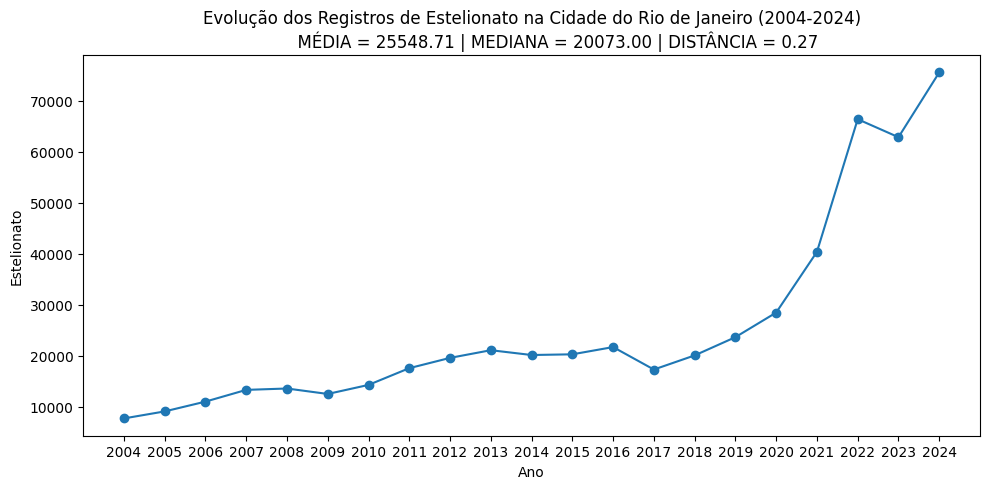

In [28]:
#GRÁFICO DA EVOLUÇÃO DOS REGISTROS DE ESTELIONATO NA CIDADE DO RIO DE JANEIRO (2014-2024)
plt.figure(figsize=(10,5))
plt.plot(df_estl['ano'], df_estl['estelionato'], marker='o', linestyle='-')
plt.title(f'Evolução dos Registros de Estelionato na Cidade do Rio de Janeiro (2004-2024)\n\
          MÉDIA = {media_estl:.2f} | MEDIANA = {mediana_estl:.2f} | DISTÂNCIA = {distancia_estl:.2f}')
plt.xlabel('Ano')
plt.ylabel('Estelionato')
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

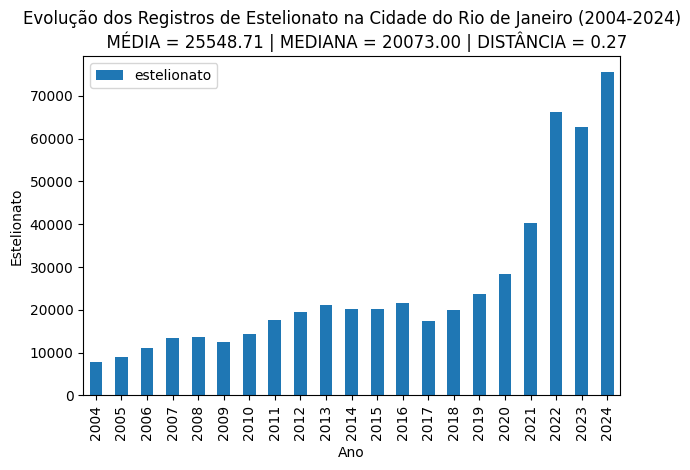

In [29]:
plt.figure(figsize=(10,5))
df_estl.plot(kind='bar' , x= 'ano', y= 'estelionato')
plt.title(f'Evolução dos Registros de Estelionato na Cidade do Rio de Janeiro (2004-2024)\n \
     MÉDIA = {media_estl:.2f} | MEDIANA = {mediana_estl:.2f} | DISTÂNCIA = {distancia_estl:.2f}')
plt.xlabel('Ano')
plt.ylabel('Estelionato')
plt.tight_layout()
plt.show()

In [30]:
#df total de registros de estelionatos por delegacia
df_dlg = df_RJ.groupby(['cisp'])['estelionato'].sum().reset_index()
df_dlg = df_dlg.sort_values(by = 'estelionato').reset_index()
df_dlg

,index,cisp,estelionato
0,41,45,98
1,7,11,1144
2,4,7,1877
3,39,43,5125
4,40,44,5756
5,27,31,5859
6,36,40,5939
7,13,17,6130
8,1,4,6552
9,21,25,6588


In [31]:
#ARRAY, Q1, Q2 E Q3
df_array_dlg = np.array(df_dlg['estelionato'])
q1_dlg = np.percentile(df_array_dlg, 25)
q2_dlg= np.percentile(df_array_dlg, 50)
q3_dlg = np.percentile(df_array_dlg, 75)
print(f"Q1={q1_dlg}\nQ2={q2_dlg}\nQ3={q3_dlg}")
df_dlg_q3 = df_dlg.loc[(df_dlg['estelionato'] >= q3_dlg)].reset_index()
df_dlg_q3 #para verificar a quantidade de delgacia na amostra de 25% com mais ocorrências

Q1=6819.5
Q2=11787.0
Q3=16638.0


,level_0,index,cisp,estelionato
0,31,10,14,16787
1,32,38,42,16807
2,33,6,10,17822
3,34,15,19,18689
4,35,8,12,19019
5,36,2,5,19720
6,37,30,34,21153
7,38,0,1,25531
8,39,28,32,28267
9,40,31,35,35210


In [32]:
media_dlg = np.mean(df_array_dlg)
mediana_dlg = np.median(df_array_dlg)
distancia_dlg = (media_dlg - mediana_dlg)/mediana_dlg
print(f"MÉDIA = {media_dlg:.2f}\nMEDIANA = {mediana_dlg:.2f}\nDISTÂNCIA = {distancia_dlg:.2f}")

MÉDIA = 12774.36
MEDIANA = 11787.00
DISTÂNCIA = 0.08


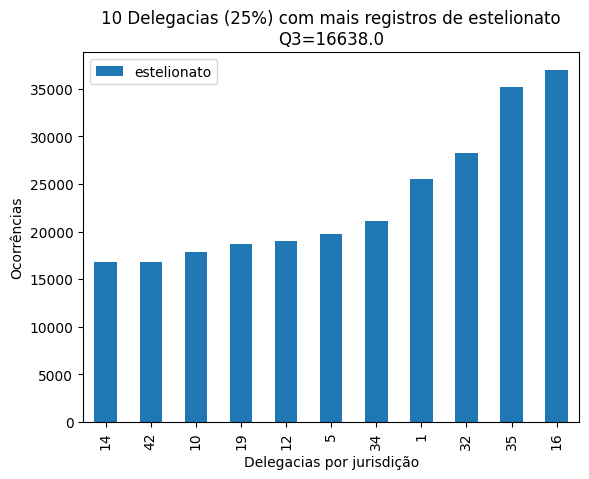

In [33]:

df_dlg_q3.plot(kind='bar' , x= 'cisp', y= 'estelionato')
plt.xlabel('Delegacias por jurisdição')
plt.ylabel('Ocorrências')
plt.title(f'10 Delegacias (25%) com mais registros de estelionato\nQ3={q3_dlg}')
plt.show()

In [34]:
#OUTLIERS
iqr_dlg = q3_dlg - q1_dlg
lim_sup_dlg = q3_dlg + (1.5 * iqr_dlg)
lim_inf_dlg = q1_dlg - (1.5 * iqr_dlg)
outliers_dlg = []
for o in df_array_dlg:
    if o > lim_sup_dlg or o < lim_inf_dlg:
        outliers_dlg.append(o)
print(f"Q1={q1_dlg:.2f}\nQ2={q2_dlg:.2f}\nQ3={q3_dlg:.2f}")
print(f"IQR (Q3 - Q1): {iqr_dlg:.2f}\nLimite Superior: {lim_sup_dlg:.2f}\nLimite Inferior: {lim_inf_dlg:.2f}\nMediana: {mediana_dlg:.2f} ")


Q1=6819.50
Q2=11787.00
Q3=16638.00
IQR (Q3 - Q1): 9818.50
Limite Superior: 31365.75
Limite Inferior: -7908.25
Mediana: 11787.00 


In [35]:
#df_dlg.boxplot(column='estelionato')
#o comando acima calcula os percentis, mediana e outliers sozinho, 
# #mas por algum motivo não está correstpondendo aos valores encontrados no calculo efetuado acima
#plt.boxplot(df_dlg, showmeans=True, showfliers=True)
#plt.show()
#esse outro comando coloca tres caixas por default para comparação. Nao se aplica ao estudo. 
# #alem de que os valores também estão errados

<Figure size 800x600 with 0 Axes>

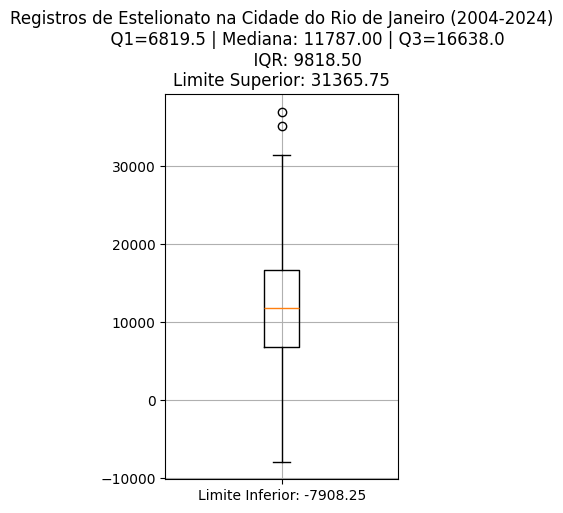

In [36]:
plt.figure(figsize=(8, 6))
bxp_stats = [{
    'med': mediana_dlg,
    'q1': q1_dlg,
    'q3': q3_dlg,
    'whislo': lim_inf_dlg,
    'whishi': lim_sup_dlg,
    'fliers': outliers_dlg,
    'label': 'Limite Inferior: -7908.25'
}]

fig, ax = plt.subplots(figsize=(3, 5))
ax.bxp(bxp_stats, vert=True, showfliers=True)
plt.title(f"Registros de Estelionato na Cidade do Rio de Janeiro (2004-2024)\n\
          Q1={q1_dlg} | Mediana: {mediana_dlg:.2f} | Q3={q3_dlg}\n\
          IQR: {iqr_dlg:.2f}\nLimite Superior: {lim_sup_dlg:.2f}")
#plt.ylabel("Número de registros")
plt.grid(True)
plt.show()

##Crimes Violentos na Região dos Lagos

In [54]:
#dataframe ja criado anteriormente
#df_base_mun_mensal.head(5)
df_munic = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/BaseMunicipioMensal.csv", sep=";", encoding="latin1")
df_munic
df_munic.info()
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12604 entries, 0 to 12603
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   fmun_cod                    12604 non-null  int64 
 1   fmun                        12604 non-null  object
 2   ano                         12604 non-null  int64 
 3   mes                         12604 non-null  int64 
 4   mes_ano                     12604 non-null  object
 5   regiao                      12604 non-null  object
 6   hom_doloso                  12604 non-null  int64 
 7   lesao_corp_morte            12604 non-null  int64 
 8   latrocinio                  12604 non-null  int64 
 9   cvli                        12604 non-null  int64 
 10  hom_por_interv_policial     12604 non-null  int64 
 11  letalidade_violenta         12604 non-null  int64 
 12  tentat_hom                  12604 non-null  int64 
 13  lesao_corp_dolosa           12604 non-null  in

In [55]:
#identificando os municipios da região dos lagos
reg_lagos = ['Araruama','Armação dos Búzios', 'Arraial do Cabo', 'Cabo Frio', 'Iguaba Grande', 'São Pedro da Aldeia','Saquarema']

In [58]:

df_munic['crimes_violentos'] = pd.concat([
    df_munic['hom_doloso'],
    df_munic['lesao_corp_morte'],
    df_munic['latrocinio'],
    df_munic['cvli'],
    df_munic['hom_por_interv_policial'],
    df_munic['letalidade_violenta'],
    df_munic['tentat_hom'],
    df_munic['lesao_corp_dolosa'],
    df_munic['estupro']
    ], axis=1).sum(axis=1)
df_crimes_violentos = df_munic.groupby('fmun')['crimes_violentos'].sum().reset_index()
df_lagos = df_crimes_violentos.loc[df_crimes_violentos['fmun'].isin(reg_lagos)]
df_lagos = df_lagos.sort_values(by='crimes_violentos')#, ascending=False)

In [59]:

df_lagos_array = np.array(df_lagos['crimes_violentos'])
media_lagos = np.mean(df_lagos_array)
mediana_lagos = np.median(df_lagos_array)
dist_lagos = (media_lagos - mediana_lagos)/mediana_lagos
print(f'Media= {media_lagos}\nMediana= {mediana_lagos}\nDistância= {dist_lagos}')

Media= 6581.285714285715
Mediana= 5981.0
Distância= 0.10036544295029505


In [60]:
q1_lg = np.percentile(df_lagos_array, 25)
q2_lg = np.percentile(df_lagos_array, 50)
q3_lg = np.percentile(df_lagos_array, 75)
iqr_lg = q3_lg - q1_lg
lim_sup_lg = q3_lg + (1.5 * iqr_lg)
lim_inf_lg = q1_lg - (1.5 * iqr_lg)
print(f'Q1= {q1_lg}  Q2= {q2_lg}  Q3= {q3_lg}\nLimite superior= {lim_sup_lg}\nLimite Inferior= {lim_inf_lg}')


Q1= 3128.0  Q2= 5981.0  Q3= 7978.5
Limite superior= 15254.25
Limite Inferior= -4147.75


In [61]:

outlier_lagos = df_lagos.loc[(df_lagos['crimes_violentos']>= lim_sup_lg) & (df_lagos['crimes_violentos']<= lim_inf_lg)]
outlier_lagos

,fmun,crimes_violentos


In [62]:

cv_menor25 = df_lagos.loc[(df_lagos['crimes_violentos']<=q1_lg)]
cv_menor25

,fmun,crimes_violentos
31,Iguaba Grande,1962
7,Arraial do Cabo,2779


In [65]:
cv_medio = df_lagos.loc[(df_lagos['crimes_violentos']>q1_lg) & (df_lagos['crimes_violentos'] < q3_lg)]
cv_medio

,fmun,crimes_violentos
6,Armação dos Búzios,3477
111,São Pedro da Aldeia,5981
90,Saquarema,6829


In [63]:

cv_maior25 = df_lagos.loc[(df_lagos['crimes_violentos']>=q3_lg)]
cv_maior25


,fmun,crimes_violentos
3,Araruama,9128
14,Cabo Frio,15913


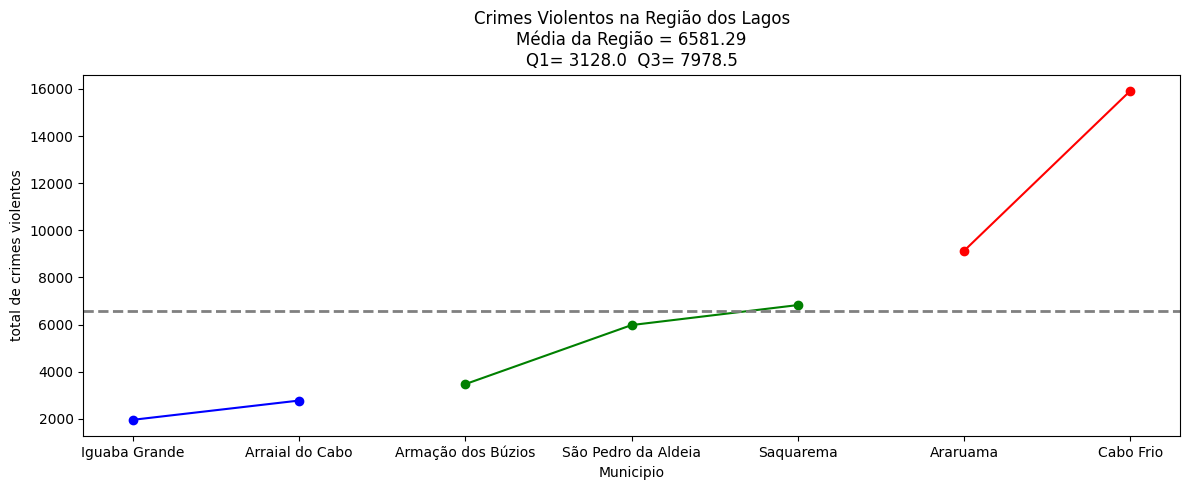

In [66]:
plt.figure(figsize=(12,5))
plt.plot(cv_menor25['fmun'], cv_menor25['crimes_violentos'], marker='o', linestyle='-', color = 'blue')
plt.plot(cv_medio['fmun'], cv_medio['crimes_violentos'], marker='o', linestyle='-', color = 'green')
plt.plot(cv_maior25['fmun'], cv_maior25['crimes_violentos'], marker='o', linestyle='-', color = 'red')
plt.title(f'Crimes Violentos na Região dos Lagos\nMédia da Região = {media_lagos:.2f}\nQ1= {q1_lg}  Q3= {q3_lg}')
plt.xlabel('Municipio')
plt.ylabel('total de crimes violentos')
plt.axhline(y=media_lagos, color='gray', linestyle='--', linewidth=2, label=f'Média: {media_lagos}')
plt.tight_layout()
plt.show()


##Média de Registro de Ocorrências por UPP

In [42]:
df_upp = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/UppEvolucaoMensalDeTitulos.csv', sep= ';', encoding='latin1')
df_upp = df_upp.loc[(df_upp['ano']>=2007) & (df_upp['ano'] < 2025)]
df_upp.columns

Index(['cod_upp', 'upp', 'ano', 'mes', 'hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'hom_por_interv_policial', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'total_roubos', 'furto_veiculos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'recuperacao_veiculos', 'armas_apreendidas', 'cump_mandado_prisao',
       'ocorr_flagrante', 'ameaca', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'registro_ocorrencias'],
      dtype='object')

In [43]:
df_ocorrencias = df_upp.groupby(['upp'])['registro_ocorrencias'].sum().reset_index()
df_ocorrencias = df_ocorrencias.sort_values(by='registro_ocorrencias')
df_ocorrencias

,upp,registro_ocorrencias
9,Cerro-Corá,893
17,Fé / Sereno,1270
25,Parque Proletário,1481
16,Formiga,1490
30,Santa Marta,1951
1,Alemão,2285
14,Escondidinho / Prazeres,2371
10,Chapéu Mangueira / Babilônia,2402
11,Chatuba,2516
3,Arará / Mandela,2753


In [44]:
df_ocorr_array = np.array(df_ocorrencias['registro_ocorrencias'])
media_upp = np.mean(df_ocorr_array)
mediana_upp = np.median(df_ocorr_array)
distancia_upp = (media_upp - mediana_upp)/mediana_upp
print(f'Média = {media_upp:.2f}\nMediana = {mediana_upp:.2f}\nDistância = {distancia_upp:.2f}')

Média = 5943.08
Mediana = 4555.50
Distância = 0.30


In [45]:
#q1, q2, q3, iqr, limite superior e inferior
q1_upp = np.percentile(df_ocorr_array,25)
q2_upp = np.percentile(df_ocorr_array,50)
q3_upp = np.percentile(df_ocorr_array,75)
iqr_upp = q3_upp - q1_upp
lim_sup_upp = q3_upp + (1.5*iqr_upp)
lim_inf_upp = q1_upp - (1.5*iqr_upp)
print(f"Q1={q1_upp:.2f}\nQ2={q2_upp:.2f}\nQ3={q3_upp:.2f}")
print(f"IQR (Q3 - Q1): {iqr_upp:.2f}\
      \nLimite Superior: {lim_sup_upp:.2f}\nLimite Inferior: {lim_inf_upp:.2f}\nMediana: {mediana_upp:.2f} ")
#outliers UPP
outliers_upp = []
for o in df_ocorr_array:
    if o > lim_sup_upp or o < lim_inf_upp:
        outliers_upp.append(o)

Q1=2806.50
Q2=4555.50
Q3=6166.25
IQR (Q3 - Q1): 3359.75      
Limite Superior: 11205.88
Limite Inferior: -2233.12
Mediana: 4555.50 


In [46]:
df_25mais_ocorr = df_ocorrencias.loc[(df_ocorrencias['registro_ocorrencias'] >= q3)]


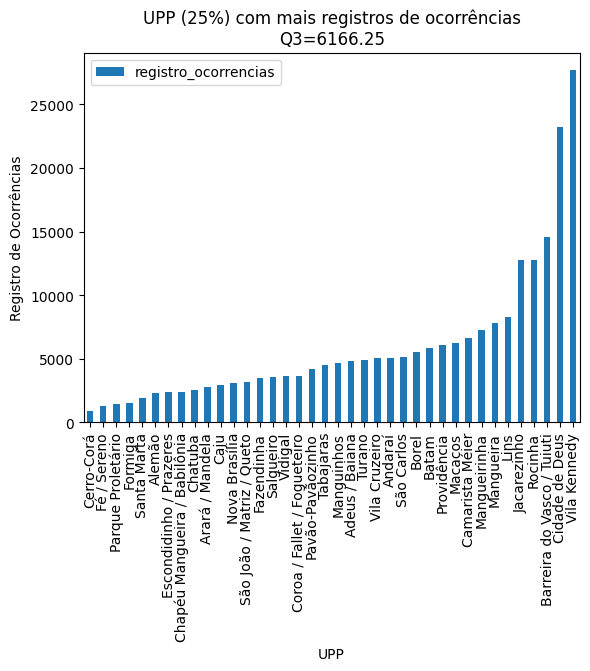

In [47]:
df_25mais_ocorr.plot(kind='bar' , x= 'upp', y= 'registro_ocorrencias')
plt.xlabel('UPP')
plt.ylabel('Registro de Ocorrências')
plt.title(f'UPP (25%) com mais registros de ocorrências\nQ3={q3_upp}')
plt.show()

<Figure size 800x600 with 0 Axes>

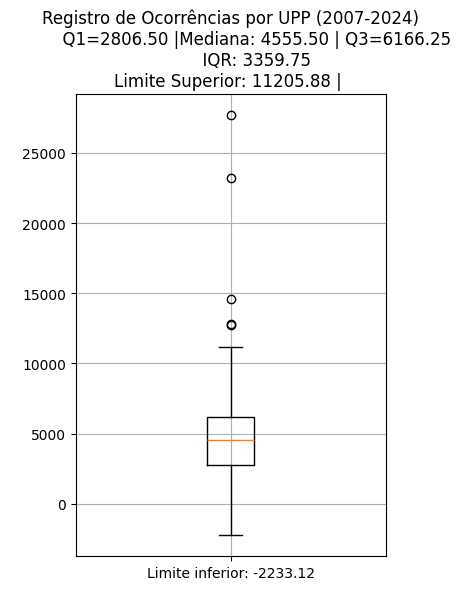

In [48]:
plt.figure(figsize=(8, 6))
bxp_stats = [{
    'med': mediana_upp,
    'q1': q1_upp,
    'q3': q3_upp,
    'whislo': lim_inf_upp,
    'whishi': lim_sup_upp,
    'fliers': outliers_upp,
    'label': 'Limite inferior: -2233.12'
}]

fig, ax = plt.subplots(figsize=(4, 6))
ax.bxp(bxp_stats, vert=True, showfliers=True)
plt.title(f"Registro de Ocorrências por UPP (2007-2024)\n\
          Q1={q1_upp:.2f} |Mediana: {mediana_upp:.2f} | Q3={q3_upp:.2f}\n\
          IQR: {iqr_upp:.2f}\nLimite Superior: {lim_sup_upp:.2f} | ")
#plt.ylabel("Número de registros")
plt.grid(True)
plt.show()